In [24]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR

In [25]:
# Memanggil atau membaca data
df = pd.read_csv('CreditDataset.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [26]:
# Memberikan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [27]:
# Mengidentifikasi kolom kategori dan numerik
# Menentukan kolom kategori berdasarkan tipe data 'object'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [28]:
# Pilih kolom numerik selain yang bertipe 'objek'
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

In [29]:
# One-hot Encoding untuk Fitur Kategoris
# Membuat Objek OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [30]:
# Melakukan penyesuaian dan transformasi pada data berbentuk kategori
encoded_data = encoder.fit_transform(df[categorical_cols])

In [31]:
# Buat sebuah DataFrame untuk data yang dikodekan
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [32]:
# Gabungkan fitur yang telah dienkode dengan fitur numerik
# Gabungkan data numerik asli dengan data yang telah dienkode secara horizontal
X = pd.concat([df[numerical_cols], encoded_df], axis=1)

In [33]:
# Normalisasi fitur menggunakan StandardScaler
# Buat objek StandardScaler
scaler = StandardScaler()

In [34]:
# Melakukan Pencocokan dan Transformasi pada Fitur Numerik
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [35]:
# Mengasumsikan 'Class' adalah nama sebenarnya dari kolom variabel target Anda
Y = df['Class']

# Sekarang Anda dapat melanjutkan dengan pemisahan data latih dan uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Creating a svm model

In [36]:
# Melatih model SVR
# Membuat model SVR dengan kernel linear
svr_model = SVR(kernel='linear', C=1.0)

In [37]:
# Latih model SVR menggunakan data pelatihan
svr_model.fit(X_train, Y_train)

SVR(kernel='linear')

Regression Report

In [38]:
# Membuat prediksi pada data uji
Y_pred = svr_model.predict(X_test)

In [39]:
# Impor pustaka yang diperlukan
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat prediksi pada data uji
Y_pred = svr_model.predict(X_test)

# Menghitung metrik regresi
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Membuat laporan regresi
laporan_regresi = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "R-squared (R2)": r2
}

In [40]:
print("Regression Report:")
for metric, value in laporan_regresi.items():
    print(f"{metric}: {value:.4f}")

Regression Report:
Mean Squared Error (MSE): 0.0100
Mean Absolute Error (MAE): 0.0998
R-squared (R2): 0.9521


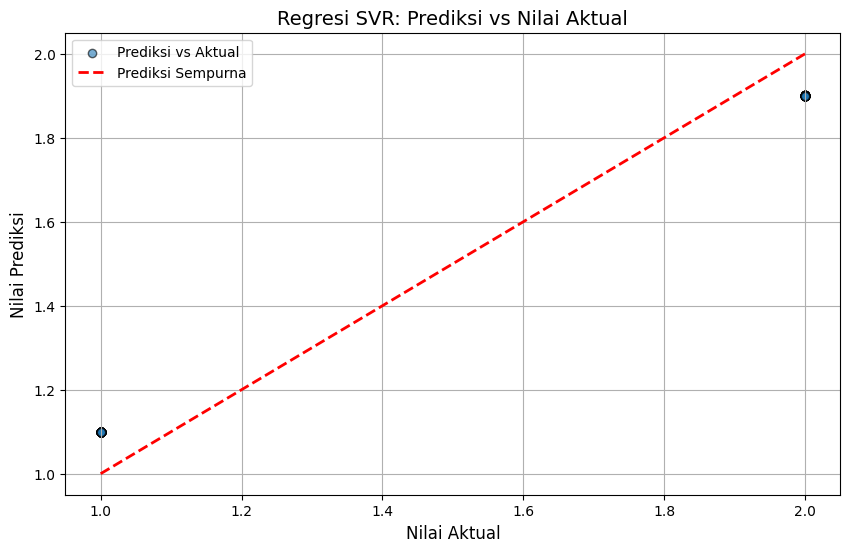

In [41]:
# Plot nilai aktual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6, edgecolors='k', label='Prediksi vs Aktual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Prediksi Sempurna')

# Tambahkan label dan judul
plt.title("Regresi SVR: Prediksi vs Nilai Aktual", fontsize=14)
plt.xlabel("Nilai Aktual", fontsize=12)
plt.ylabel("Nilai Prediksi", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Pada grafik tersebut:

- Titik biru, yang diberi label "Prediksi vs Aktual", menggambarkan nilai prediksi dari model yang dipetakan terhadap nilai aktual.
- Garis merah putus-putus, yang diberi label "Prediksi Sempurna", menunjukkan garis yang menggambarkan kesesuaian sempurna antara nilai prediksi dan nilai aktual, yaitu ketika prediksi persis sama dengan nilai aktual.

Secara keseluruhan, grafik ini menunjukkan bahwa untuk data yang diberikan, nilai prediksi tidak sepenuhnya sesuai dengan nilai aktual, karena titik-titik prediksi tampak menyimpang dari garis merah putus-putus. Plot seperti ini biasanya digunakan untuk mengevaluasi akurasi model regresi dengan menunjukkan sejauh mana prediksi mendekati nilai yang sebenarnya.